In [50]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../')

from src.emotion.analysis.data_preprocessing import (
    DataPreprocessor,
    DerivativesGetter,
    LinearInterpolator,
    RollingAverageSmoother,
)

%matplotlib inline
pd.set_option('display.max_columns', None)

In [53]:
df = pd.read_csv('/home/moritz/Workspace/masterthesis/data/identities/short_clip_debug.csv')

# TODO: Only compute derivatives, when consecutive frames are less than 10 frame apart!
preprocessing_pipeline = [
        LinearInterpolator(),
        DerivativesGetter(),
        RollingAverageSmoother(window_size=5, cols=["Derivatives"]),
    ]

preprocessor = DataPreprocessor(preprocessing_pipeline)
pre_df = preprocessor.preprocess_data(df)

pre_df.head()

,Frame,ClassID,Confidence,x_center,y_center,Angry,Disgust,Happy,Sad,Surprise,Fear,Neutral,GazeDetections,Brightness,Derivatives
0,0,person_id1,0.887372,892.685791,143.625381,0.025781,0.016932,0.172089,0.042134,0.014512,0.244524,0.484028,[],143.574166,1.772779
1,1,person_id1,0.885853,891.871851,143.931470,0.021232,0.014072,0.181723,0.076112,0.016593,0.201041,0.489227,[],143.570378,1.994377
2,2,person_id1,0.884333,891.057910,144.237558,0.016683,0.011213,0.191356,0.110090,0.018674,0.157558,0.494426,[],143.566591,2.127335
3,3,person_id1,0.882813,890.243970,144.543646,0.012134,0.008354,0.200990,0.144068,0.020755,0.114075,0.499625,[],143.562803,2.659169
4,4,person_id1,0.881294,889.430029,144.849734,0.007584,0.005495,0.210623,0.178047,0.022836,0.070592,0.504823,[],143.559016,9.694242


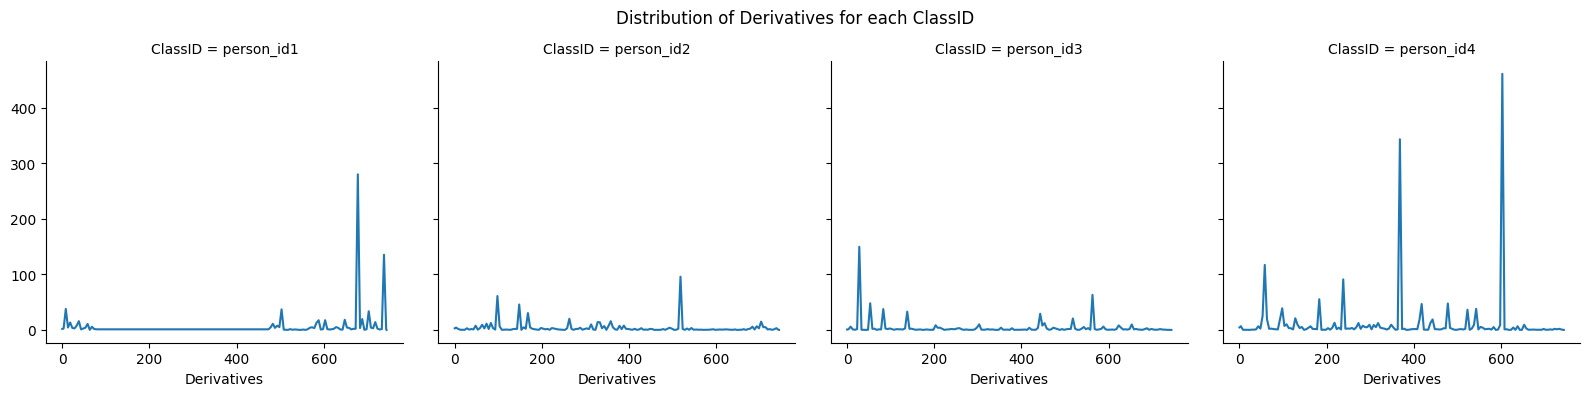

In [54]:
# Create the FacetGrid
g = sns.FacetGrid(data=pre_df, col='ClassID', col_wrap=4, height=4, sharey=True)
g.map(plt.plot, 'Derivatives')

# Set the plot properties
plt.subplots_adjust(wspace=0.1, top=0.85)
g.fig.suptitle('Distribution of Derivatives for each ClassID')

# Show the plot
plt.show()

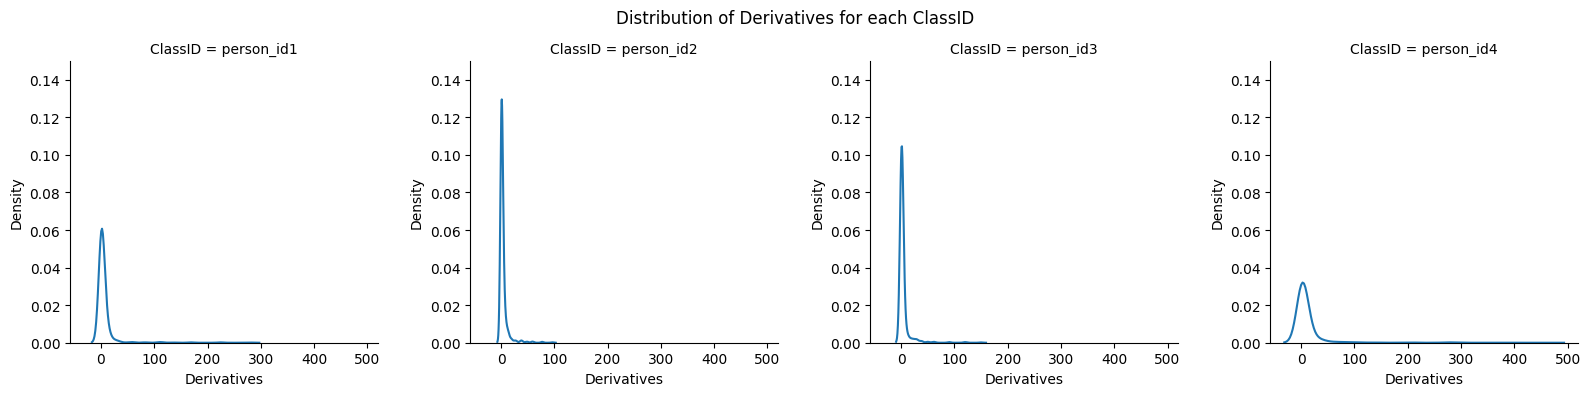

In [55]:
# TODO: Standard Normalization seems appropriate, but should we use the whole cohort as reference?
# Create the FacetGrid
g = sns.FacetGrid(data=pre_df, col='ClassID', col_wrap=4, height=4, sharey=False, sharex=True, ylim=(0, 0.15))
g.map(sns.kdeplot, 'Derivatives')

plt.subplots_adjust(wspace=0.3, top=0.85)
g.fig.suptitle('Distribution of Derivatives for each ClassID')

plt.show()

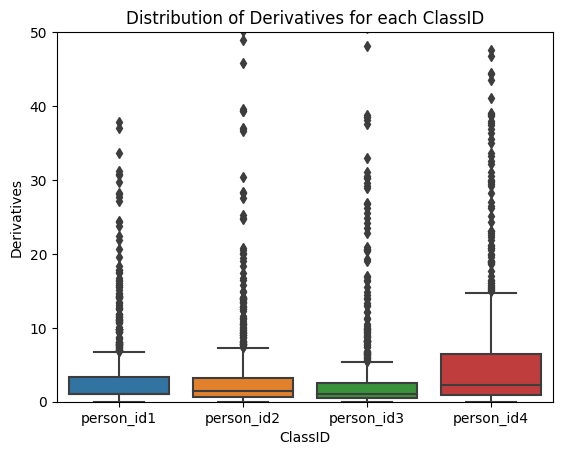

In [56]:
# Boxplot
sns.boxplot(data=pre_df, x='ClassID', y='Derivatives')

plt.title('Distribution of Derivatives for each ClassID')
# Note, that we are cutting off some outliers here
plt.ylim(0, 50)

plt.show()